# Introduction

We want to see if there is a significant difference in the number of A's given based on whether a class starts before noon or after noon. 

# Methodology
We will perform a two-tail, two-sample t-test on the data. Using [Kaggle's UW Madison Grade's Database](https://www.kaggle.com/Madgrades/uw-madison-courses#schedules.csv).

## Hypotheses
We select an alpha value of 0.05.

Null Hypothesis: There is no significant difference in the mean percentage of A's in the morning classes and afternoon classes.

Alternate Hypothesis: There is a significant difference in the mean percentage of A's in the morning and afternoon classes.

Class start and end time is listed in minutes from midnight.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import scipy.stats as stats

In [2]:
conn = psycopg2.connect("host=localhost,dbname=postgres,user=postgres")

cur = conn.cursor()

In [3]:
group_and_as = """
SELECT 
  grade.a_count
, grade.ab_count
, grade.b_count
, grade.bc_count
, grade.c_count
, grade.d_count
, grade.f_count
, sched.start_time
, sect.section_type
, grade.course_offering_uuid
, grade.section_number
FROM 
  sections sect
INNER JOIN 
  schedules sched 
ON 
  sched.uuid = sect.schedule_uuid
INNER JOIN 
  grade_distributions grade 
ON 
  sect.number = grade.section_number 
AND 
  sect.course_offering_uuid = grade.course_offering_uuid;
"""

In [4]:
cur.execute(group_and_as)
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df['total_count'] = (df['a_count'] + df['ab_count'] + df['b_count'] + df['bc_count'] 
                     + df['c_count'] + df['d_count'] + df['f_count'])
df.head()

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,start_time,section_type,course_offering_uuid,section_number,total_count
0,158,0,0,0,0,0,0,-1,FLD,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,158
1,40,5,0,0,0,0,0,725,LAB,3c59e623-7e61-343a-951a-765cb62d3304,7,45
2,40,1,1,0,0,0,0,660,LAB,3c59e623-7e61-343a-951a-765cb62d3304,6,42
3,22,16,0,0,0,0,0,725,LAB,52348693-479f-3262-b7ba-b9427aee66b8,4,38
4,27,3,2,0,1,0,1,930,LAB,a37b96cc-0586-3eac-b22e-97fb3db3bf05,5,34


In [5]:
df.sort_values(by='start_time')

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,start_time,section_type,course_offering_uuid,section_number,total_count
0,158,0,0,0,0,0,0,-1,FLD,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,158
84543,0,0,0,0,0,0,0,-1,IND,3264071e-6f30-3327-88d8-901a806232cf,40,0
84542,0,0,0,0,0,0,0,-1,IND,4c8eee65-4984-3567-b70b-535fcb80553a,40,0
171127,0,0,0,0,0,0,0,-1,IND,43a5285a-9495-3896-a3cf-9dfecf7fcac1,38,0
171128,0,0,0,0,0,0,0,-1,IND,4b101f64-7493-3927-8dc1-89f4f8a101d1,6,0
171129,0,0,0,0,0,0,0,-1,IND,4aa4884a-5b53-351b-9f0e-6a5dfe59d18b,39,0
171130,0,0,0,0,0,0,0,-1,IND,50793ba6-9022-3a1e-a67c-507a67056723,35,0
171131,0,0,0,0,0,0,0,-1,IND,c23b4b16-8a24-30bc-8890-f73d426b49a7,10,0
171132,0,0,0,0,0,0,0,-1,IND,3cc17540-721d-3c4d-981e-00f05c503aaf,2,0
171143,0,0,0,0,0,0,0,-1,IND,89b9bb93-8186-3dff-b865-7baad285e5c8,5,0


In [6]:
df.loc[df['start_time'] == -1, 'section_type'].value_counts()

IND    81726
LEC     4405
FLD     3691
SEM     1344
LAB     1331
DIS       19
Name: section_type, dtype: int64

In [7]:
df.loc[df['section_type'] == 'IND', 'section_type'].value_counts()

IND    81726
Name: section_type, dtype: int64

All the independent studies are -1. As all these values are no use to our test (because we are interested in start time) we will drop all start_times of -1. We will also cut of irregular times (classes that start before 6AM) because these are potentially errors during input.

In [8]:
df = df[df['start_time'] >= 360]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124879 entries, 1 to 217398
Data columns (total 12 columns):
a_count                 124879 non-null int64
ab_count                124879 non-null int64
b_count                 124879 non-null int64
bc_count                124879 non-null int64
c_count                 124879 non-null int64
d_count                 124879 non-null int64
f_count                 124879 non-null int64
start_time              124879 non-null int64
section_type            124879 non-null object
course_offering_uuid    124879 non-null object
section_number          124879 non-null int64
total_count             124879 non-null int64
dtypes: int64(10), object(2)
memory usage: 12.4+ MB


In [9]:
df.sort_values(by='total_count')

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,start_time,section_type,course_offering_uuid,section_number,total_count
108664,0,0,0,0,0,0,0,530,LEC,c1aa1577-6a6d-3434-ac8d-b25f7cf4ffb4,1,0
142135,0,0,0,0,0,0,0,360,FLD,f943682c-581e-36bf-b845-8abc99468c9e,8,0
142136,0,0,0,0,0,0,0,960,LEC,a944b36e-aef5-3e2c-a201-6944f778466f,1,0
142140,0,0,0,0,0,0,0,960,LEC,6216ac6c-5159-3b7e-a4bb-d3c45e0d5ca8,1,0
142141,0,0,0,0,0,0,0,360,FLD,6b1826f3-520c-3672-8706-30d151478736,1,0
142142,0,0,0,0,0,0,0,360,FLD,6b1826f3-520c-3672-8706-30d151478736,3,0
142143,0,0,0,0,0,0,0,360,FLD,b1c3fec5-4437-3a26-8394-589692b570dc,9,0
204254,0,0,0,0,0,0,0,530,SEM,ed6861ff-2a1d-3d35-84a4-e2fc93857ba8,13,0
142144,0,0,0,0,0,0,0,360,FLD,e88dd313-b736-37ba-be9c-10d64fc954f4,5,0
142145,0,0,0,0,0,0,0,865,SEM,b273329d-6200-3afd-af85-f795ad91f90f,3,0


There are still a number of classes that have no students. We want to drop these as it is not reflective of our study.

In [10]:
df = df[df['total_count'] != 0]

In [11]:
df['total_count'].value_counts()

13     3792
12     3661
15     3594
10     3574
19     3546
16     3530
11     3522
18     3489
14     3482
8      3468
9      3391
17     3377
7      3241
6      3209
20     3072
23     2544
22     2527
24     2501
21     2340
25     1666
26     1318
27     1164
28     1017
30      909
29      857
39      840
40      797
31      743
5       742
34      699
       ... 
565       2
715       2
714       2
683       2
584       1
605       1
712       1
460       1
417       1
439       1
455       1
462       1
376       1
567       1
487       1
570       1
404       1
490       1
428       1
488       1
492       1
454       1
547       1
485       1
571       1
444       1
450       1
491       1
572       1
623       1
Name: total_count, Length: 499, dtype: int64

In [12]:
df2 = df.copy()

In [13]:
df2['ratio_of_as'] = df['a_count'] / df['total_count']

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101089 entries, 1 to 217398
Data columns (total 13 columns):
a_count                 101089 non-null int64
ab_count                101089 non-null int64
b_count                 101089 non-null int64
bc_count                101089 non-null int64
c_count                 101089 non-null int64
d_count                 101089 non-null int64
f_count                 101089 non-null int64
start_time              101089 non-null int64
section_type            101089 non-null object
course_offering_uuid    101089 non-null object
section_number          101089 non-null int64
total_count             101089 non-null int64
ratio_of_as             101089 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 10.8+ MB


/Users/kaylischulz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


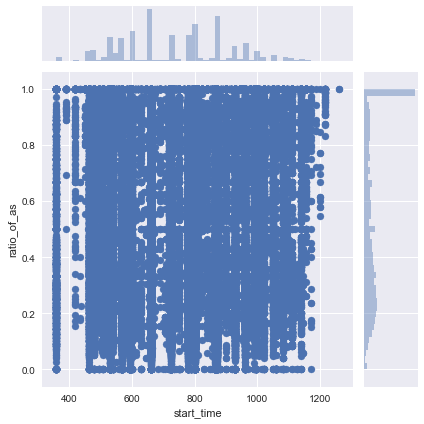

In [15]:
sns.jointplot('start_time', 'ratio_of_as',df2)

In [16]:
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81715 entries, 1 to 217398
Data columns (total 13 columns):
a_count                 81715 non-null int64
ab_count                81715 non-null int64
b_count                 81715 non-null int64
bc_count                81715 non-null int64
c_count                 81715 non-null int64
d_count                 81715 non-null int64
f_count                 81715 non-null int64
start_time              81715 non-null int64
section_type            81715 non-null object
course_offering_uuid    81715 non-null object
section_number          81715 non-null int64
total_count             81715 non-null int64
ratio_of_as             81715 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 8.7+ MB


/Users/kaylischulz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


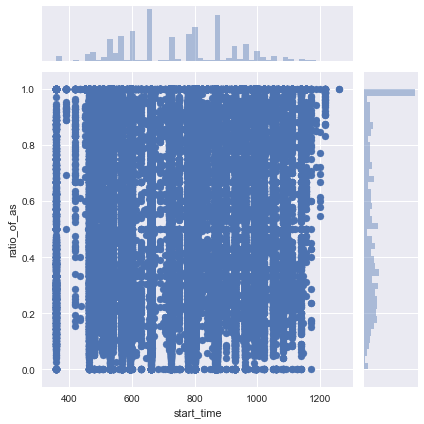

In [17]:
sns.jointplot('start_time', 'ratio_of_as',df2)

In [18]:
df2['section_type'].value_counts()

LEC    62645
LAB     8476
SEM     8342
FLD     1965
DIS      287
Name: section_type, dtype: int64

In [19]:
morning_df = df2.loc[df['start_time'] < 720]
afternoon_df = df2.loc[df['start_time'] >= 720]

In [20]:
morning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36770 entries, 2 to 217398
Data columns (total 13 columns):
a_count                 36770 non-null int64
ab_count                36770 non-null int64
b_count                 36770 non-null int64
bc_count                36770 non-null int64
c_count                 36770 non-null int64
d_count                 36770 non-null int64
f_count                 36770 non-null int64
start_time              36770 non-null int64
section_type            36770 non-null object
course_offering_uuid    36770 non-null object
section_number          36770 non-null int64
total_count             36770 non-null int64
ratio_of_as             36770 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 3.9+ MB


In [21]:
afternoon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44945 entries, 1 to 217393
Data columns (total 13 columns):
a_count                 44945 non-null int64
ab_count                44945 non-null int64
b_count                 44945 non-null int64
bc_count                44945 non-null int64
c_count                 44945 non-null int64
d_count                 44945 non-null int64
f_count                 44945 non-null int64
start_time              44945 non-null int64
section_type            44945 non-null object
course_offering_uuid    44945 non-null object
section_number          44945 non-null int64
total_count             44945 non-null int64
ratio_of_as             44945 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 4.8+ MB


/Users/kaylischulz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


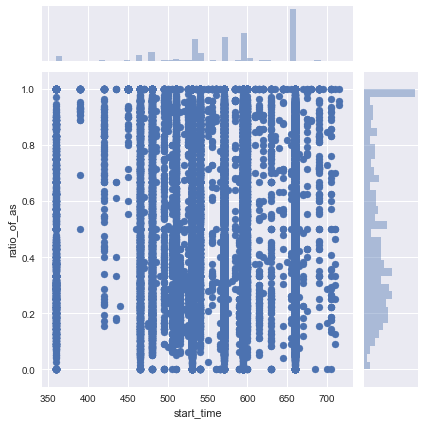

In [22]:
sns.jointplot('start_time', 'ratio_of_as',morning_df)

/Users/kaylischulz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


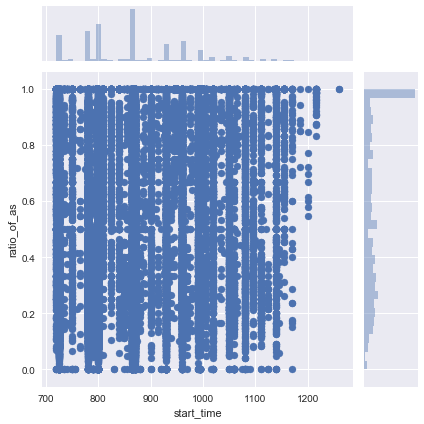

In [23]:
sns.jointplot('start_time', 'ratio_of_as',afternoon_df)